### Regression

The purpose of regression is to fit a line.  This line is used to interpret some sort of relationship between one or more "x" variables and a "y" variable.  For example:

$$
y = \alpha + \beta x
$$

describes a straight line with intercept $\alpha$ and slope $\beta$.  The variable `x` is referred to as the *regressor* in this model.  Models can have multiple regressors.

We can generate some data that draws such a line.  In this example, take $\alpha=4$ and $\beta=0.5$.

In [3]:
import pandas as pd
import numpy as np

np.random.seed(0)
line = pd.DataFrame(columns=['x','y']) # creates an empty DataFrame (a DataFrame with no rows) named 'line' that has column names 'x' and 'y'
line['x'] = np.random.randint(low=-10, high=10, size=100)
line['y'] = 4 + 0.5 * line['x']
line.head()

,x,y
0,2,5.0
1,5,6.5
2,-10,-1.0
3,-7,0.5
4,-7,0.5


Using the `seaborn` plot function `lineplot`(), we can visualize this line.

<AxesSubplot:xlabel='x', ylabel='y'>

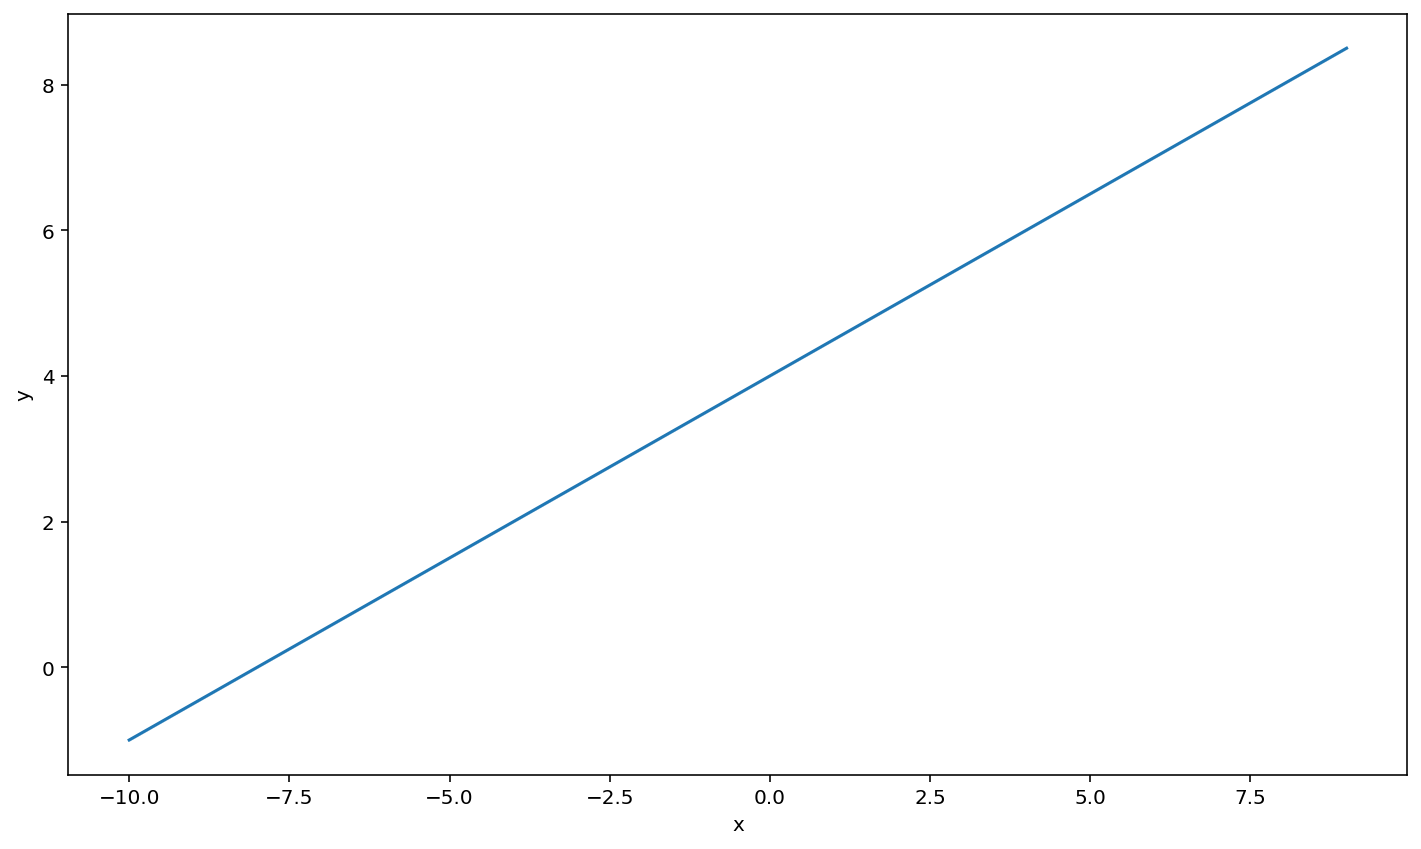

In [4]:
import seaborn as sns

sns.lineplot(x='x', y='y', data=line)

No surprises here, we get a straight line.  The slope is one-half, and the intercept is 4.

<span style="color:red">**Concept review**:</span> Report the descriptive statistics for `x` and `y` below.

In [5]:
line.describe()

,x,y
count,100.000000,100.000000
mean,-1.120000,3.440000
std,6.148466,3.074233
min,-10.000000,-1.000000
25%,-7.000000,0.500000
50%,-1.500000,3.250000
75%,5.000000,6.500000
max,9.000000,8.500000


In the real world, relationships between $x$'s and $y$'s are usually complicated.  That is, there is no line that perfectly describes the connection between $x$ and $y$.  Our goal is to find the best possible approximation of a relationship.  For instance, change the above equation to

$$
y = \alpha + \beta x + u
$$

where $u$ is some random, un-observed phenomenon that makes any pair of values $(x,y)$ partially unpredictable.  Consider the following simulated dataset, where $y$ and $x$ have a known relationship (we know $\alpha=4$ and $\beta=0.5$) with some error thrown in to the mix.

<AxesSubplot:xlabel='x', ylabel='y'>

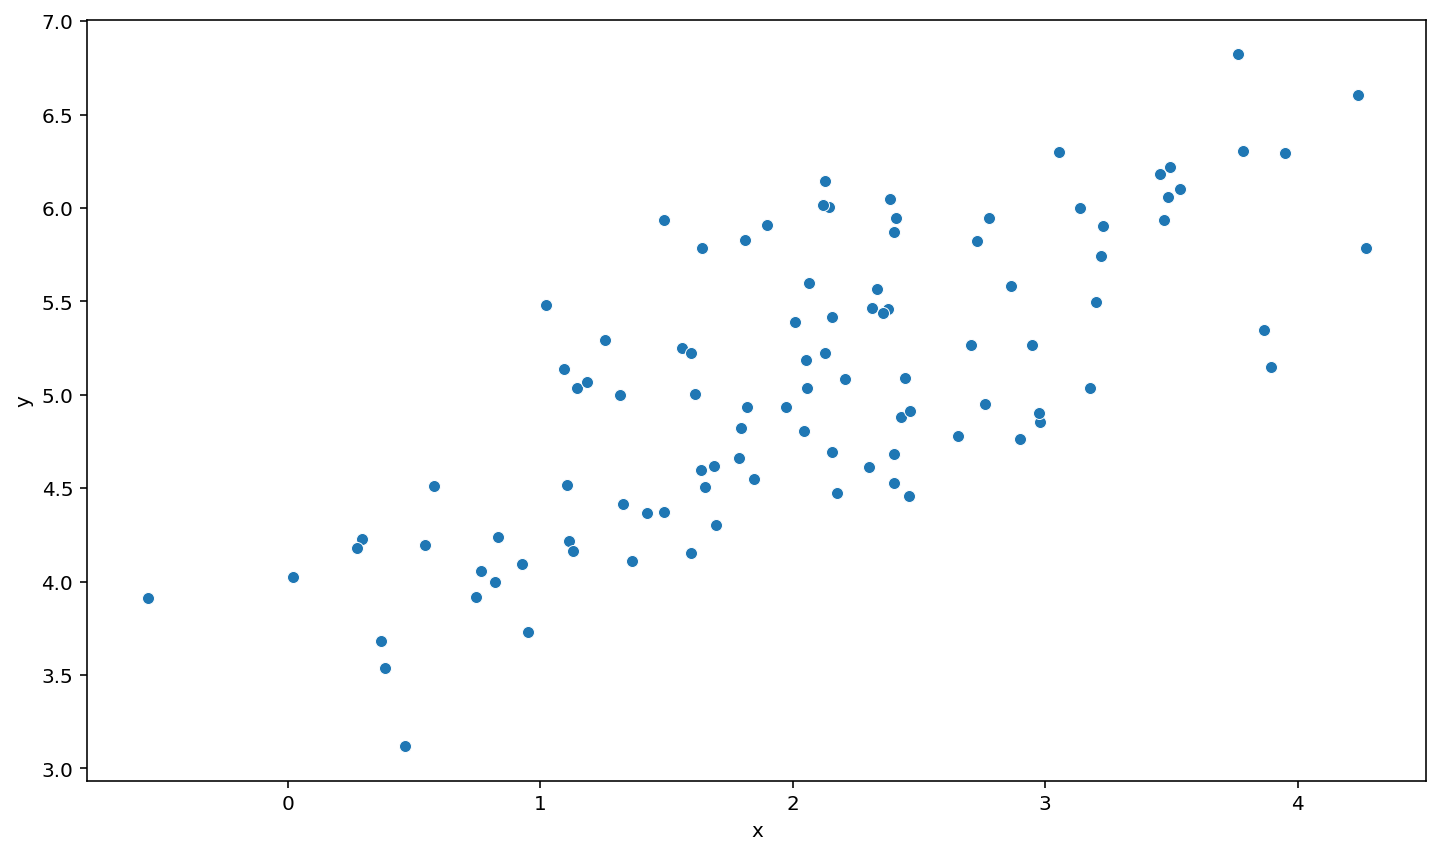

In [8]:
np.random.seed(0)
df = pd.DataFrame(columns=['x','y'])
df['x'] = np.random.normal(2, 1, 100)
df['y'] = 4 + 0.5 * df['x'] + np.random.normal(0, 0.5, 100)
sns.scatterplot(x='x', y='y', data=df)

In this example, the random error component $u$ makes it so that $y$ is no longer perfectly described by $x$ and the parameters $\alpha,\beta$.

<span style="color:red">**Concept review**:</span> Create a new column of data called `'u'`.  Set `'u'` equal to `'y'` minus (4 plus one-half `'x'`), then plot the distribution of `'u'`.

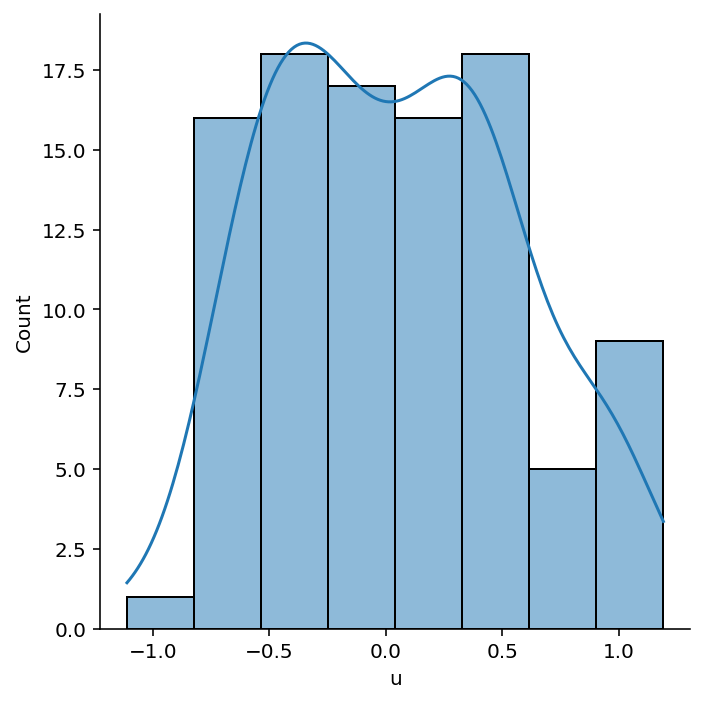

In [10]:
df['u'] = df['y'] - 4 - .5*df['x']
sns.displot(df['u'], kde=True)

When performing analytics, we'll be given data.  Suppose that data looks like what's described in `df`.  So, for example, we can see that the first few and last few rows look like:

In [5]:
df.describe()

,x,y
count,100.000000,100.000000
mean,2.059808,5.070910
std,1.012960,0.765313
min,-0.552990,3.120177
25%,1.356143,4.509295
50%,2.094096,5.037010
75%,2.737077,5.754808
max,4.269755,6.823602


When all we have is the data, the values of $\alpha$ and $\beta$ are unknown to us.  In this case, our mission is to use linear regression so that we have the best possible linear fit between $y$ and $x$.

Such a "line of best fit" is shown below.

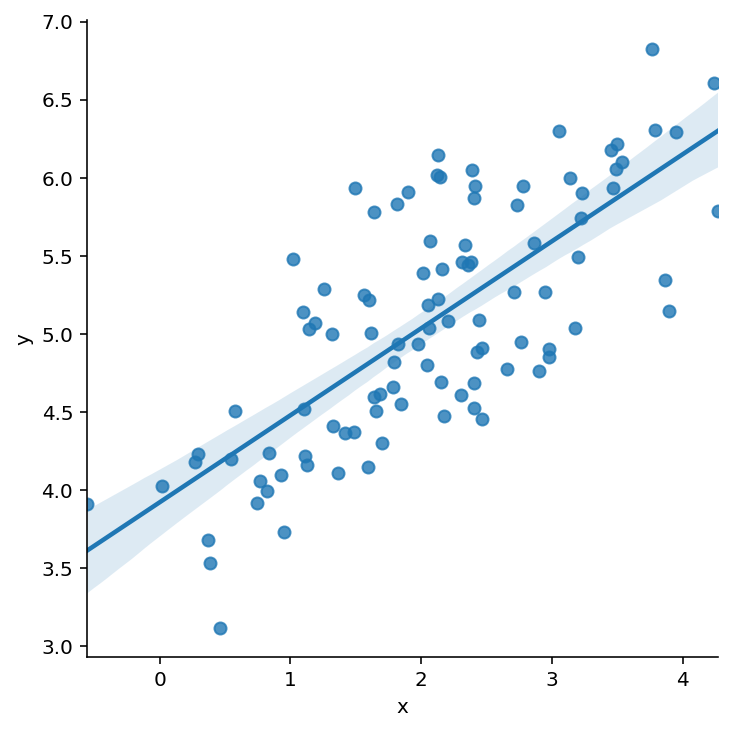

In [6]:
sns.lmplot(x='x', y='y', data=df)

This line is solved, by `seaborn`, using regression.  But `seaborn` only computes the regression fit for the purposes of making a plot.  It doesn't tell you what the *beta coefficient*, $\beta$, is estimated to be.  Nor does it report the estimated intercept $\alpha$.

When parameters like $\alpha$ and $\beta$ are estimated, we usually put "hats" on them to denote that it's an estimated value.  Thus, the estimated relationship is given by

$$
\hat{y} = \hat{\alpha} + \hat{\beta} x
$$

which tells us that, using the estimated values for $\alpha$ and $\beta$, one would estimate the value for $y$ to be $\hat{y}$, given the value $x$.

There are many commands that can be used to generate this linear regression fit, and those will be discussed in a little bit.

First, let's consider the effect of an outlier on the sample.

Let's hard-code a data error in the `pandas` `DataFrame` variable `df` by using the `.loc` function to change the `y` value for one of the rows.

In [7]:
df.loc[0,'y'] = df.loc[0,'y']*10

What we've done in the above line of code is increase the `y` value of the first observation by a factor of 10.  This is a reasonable error to consider, using real (non-simulated) data, someone could very well accidentally hit the zero key when entering in rows of `x` and `y` data by hand.

First, let's look at the boxplot.

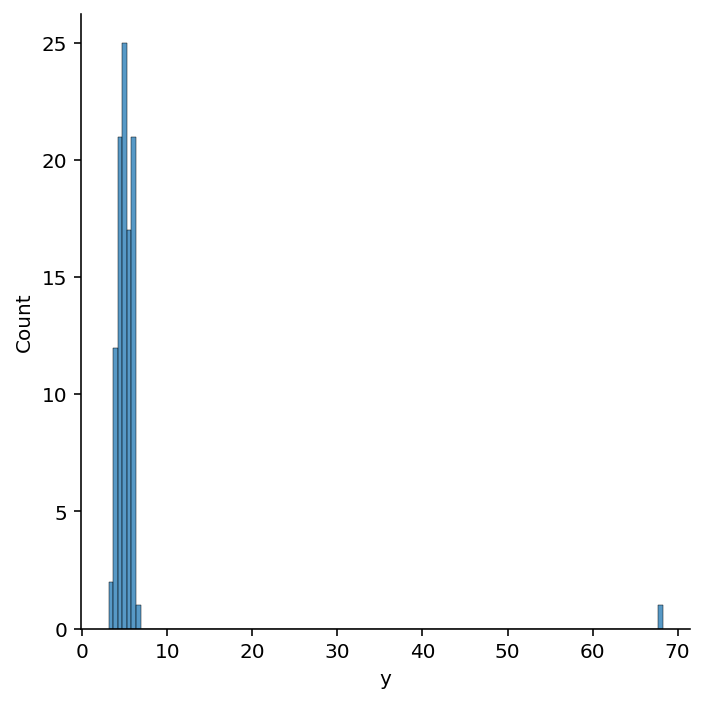

In [13]:
sns.displot(df['y'])

The outlier we've entered stands out clearly.  We can verify that the outlier we're seeing is in fact the first row we modified by typing:

In [14]:
df.iloc[0]

x     3.764052
y    68.236015
Name: 0, dtype: float64

and noticing that the `y` value there is indeed the point we're seeing as an outlier in the data.

What happens if we don't correct for this issue when we perform an analytics task like linear regression?  Note that the scatter plot likewise shows a big problem due to the outlier.

<AxesSubplot:xlabel='x', ylabel='y'>

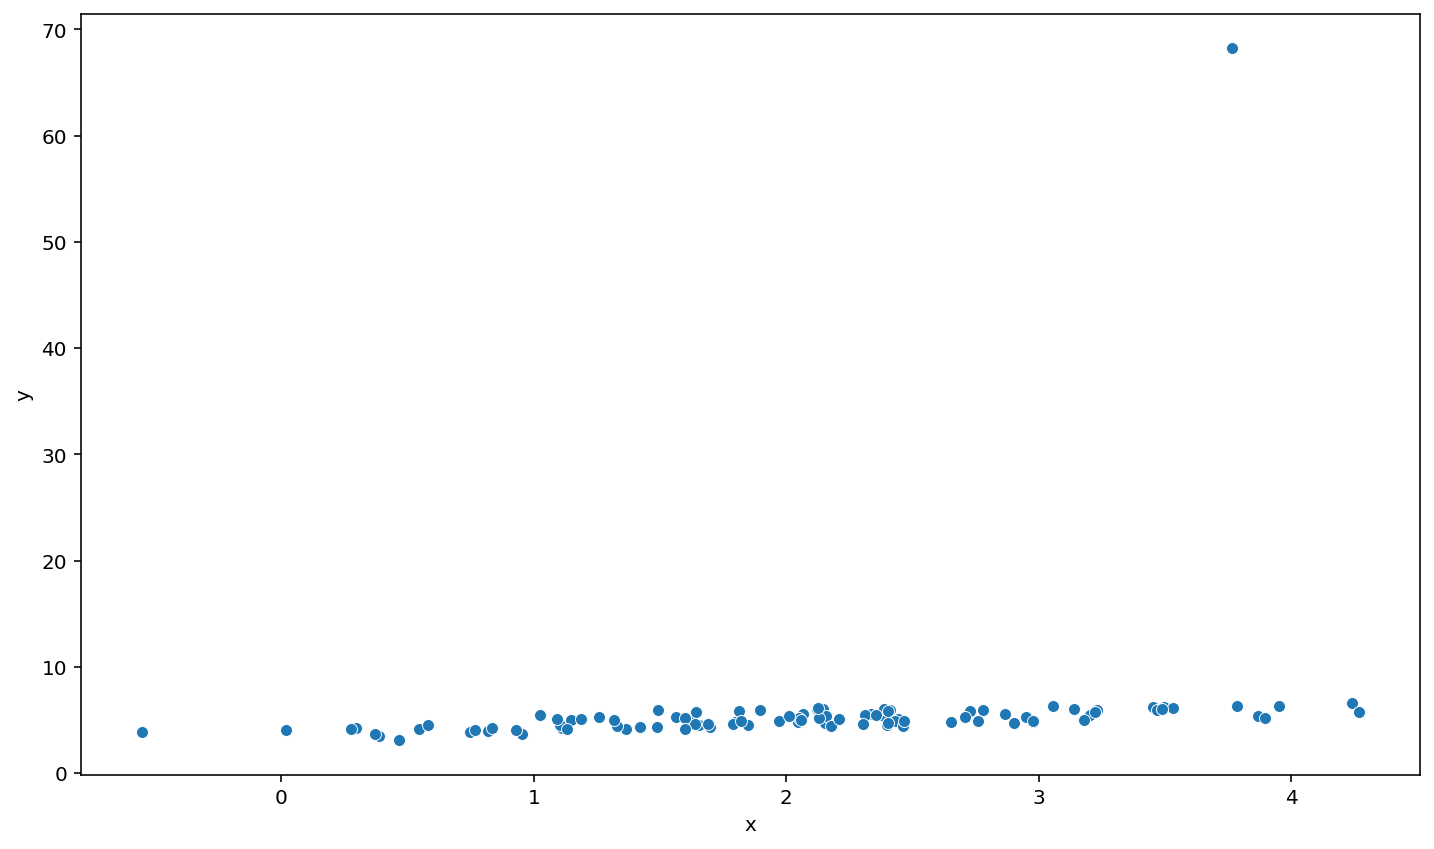

In [15]:
sns.scatterplot(x='x', y='y', data=df)

How can we expect Python to find a line of best fit through that scatter plot, when there is such an egregious outlier in the plot?

Look what happens in the regression:

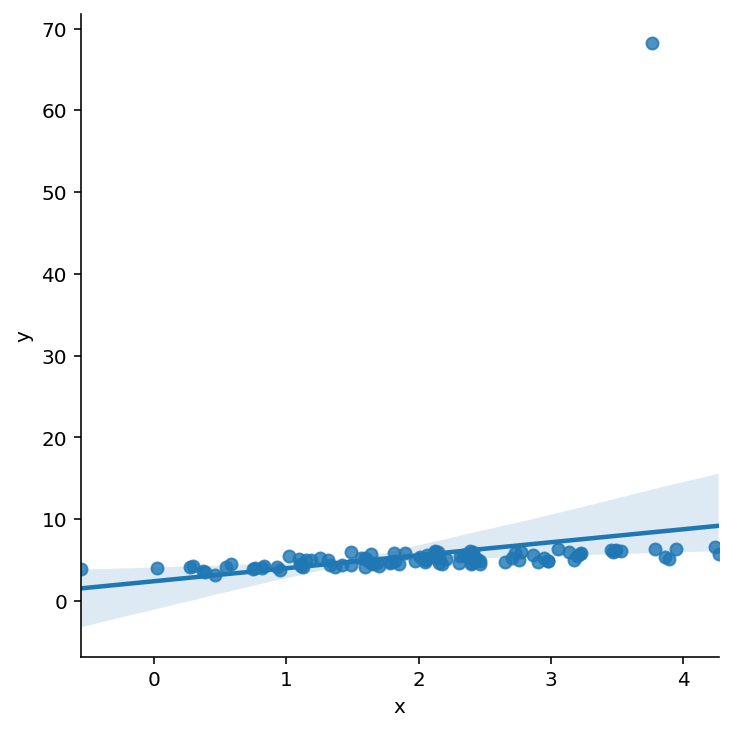

In [16]:
sns.lmplot(x='x', y='y', data=df)

While it may be hard to see the change, note that the line of best fit now reaches above all of the y values on the right hand side of the scatter plot, and dips below them on the left hand side.  In the earlier regression, this did not happen.  What's occurred here is the line of best fit now has a much steeper slope than it did before.  This is because the outlier point, which is towards the right side of the `x` distribution and is significantly above the rest of the `y` data, skews the line of best fit to be much more positively sloping.

We'll discuss solutions to remove outliers on an ad hoc basis.

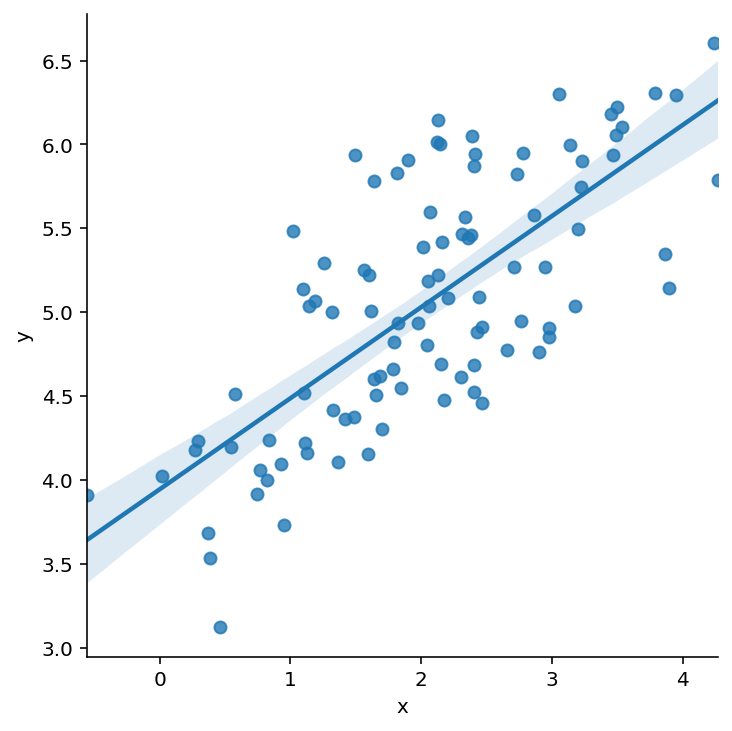

In [17]:
sns.lmplot(x='x', y='y', data=df[df['y'] < 20])

For some real-world sample data, we will make use of resources available through the `wooldridge` module.  The `wooldridge` module was written to correspond to the introductory textbook by Wooldridge.

In Jupyter, we can install user-written modules with the `!pip` magic command.

In [21]:
!pip install wooldridge --user

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


Load the `'ceosal1'` data and describe it.

In [24]:
import wooldridge as woo
ceos = woo.data('ceosal1')
ceos.describe()

,salary,pcsalary,sales,roe,pcroe,ros,indus,finance,consprod,utility,lsalary,lsales
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,1281.119617,13.282297,6923.793282,17.184211,10.800478,61.803828,0.320574,0.220096,0.287081,0.172249,6.950386,8.292265
std,1372.345308,32.633921,10633.271088,8.518509,97.219399,68.177052,0.467818,0.415306,0.453486,0.378503,0.566374,1.013161
min,223.000000,-61.000000,175.199997,0.500000,-98.900002,-58.000000,0.000000,0.000000,0.000000,0.000000,5.407172,5.165928
25%,736.000000,-1.000000,2210.300049,12.400000,-21.200001,21.000000,0.000000,0.000000,0.000000,0.000000,6.601230,7.700883
50%,1039.000000,9.000000,3705.199951,15.500000,-3.000000,52.000000,0.000000,0.000000,0.000000,0.000000,6.946014,8.217492
75%,1407.000000,20.000000,7177.000000,20.000000,19.500000,81.000000,1.000000,0.000000,1.000000,0.000000,7.249215,8.878636
max,14822.000000,212.000000,97649.898438,56.299999,977.000000,418.000000,1.000000,1.000000,1.000000,1.000000,9.603868,11.489144


We will consider the relation between ROE and CEO salary.

<span style="color:red">**Concept check**:</span>  Plot the line of best fit between `'salary'` (y-axis) and `'roe'` (x-axis).

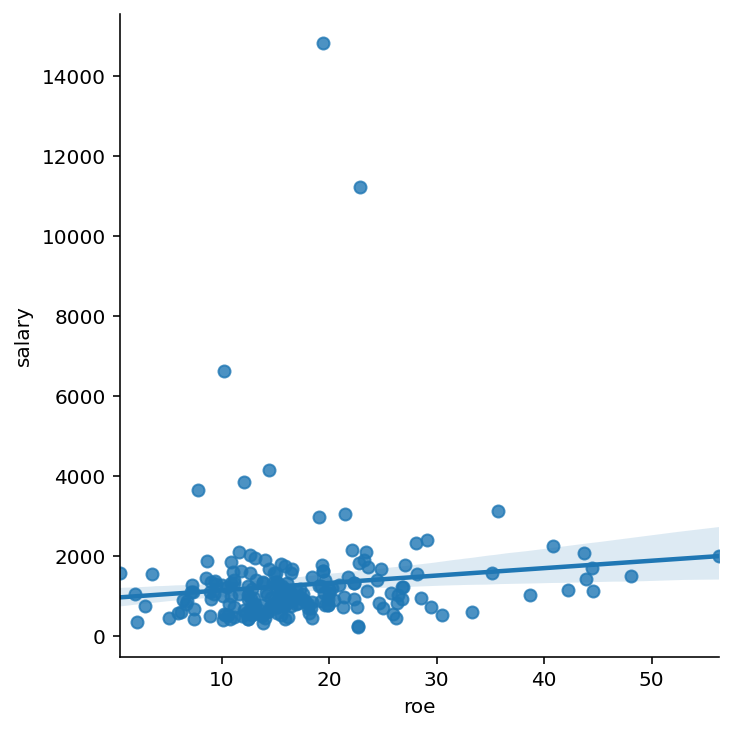

In [25]:
sns.lmplot(x='roe', y='salary', data=ceos)

Note the outliers.  To "zoom in", let's ignore those data points.

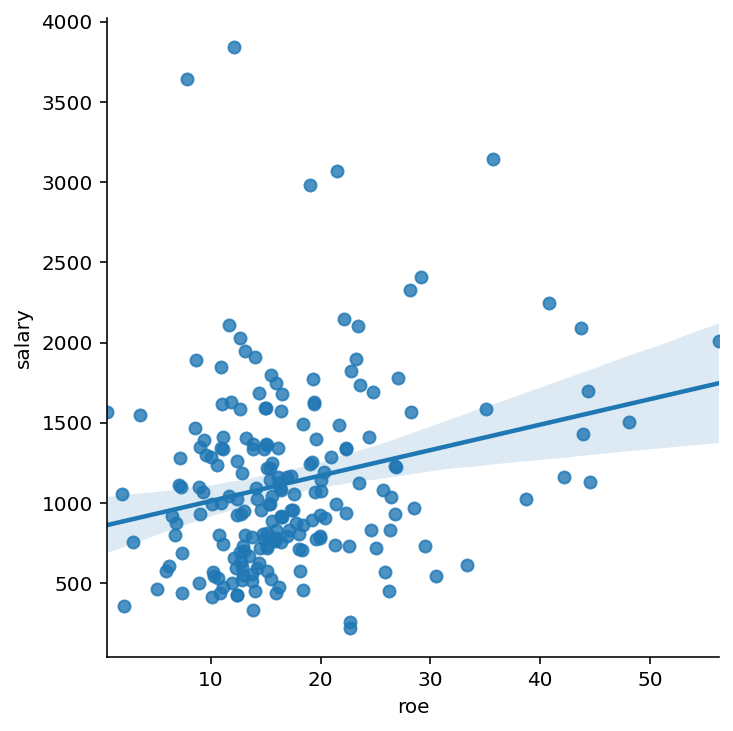

In [26]:
sns.lmplot(x='roe', y='salary', data=ceos[ceos['salary'] < 4000])

There seems to be some sort of positive correlation, as indicated by the upward-sloping line.  But the fit is not good.  Why?  This is something that we will investigate further.